In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

reloaded


### NV levels without a magnetic field

In [3]:
B = [0.,0.,0.]
Ex = 63
Ey = 57.5
Strain = Ex-Ey
Ex = (Ex+Ey)/2 + Strain/2
Ey = (Ex+Ey)/2 - Strain/2

print Ex
print Ey

print nvlevels.get_ES_ExEy(Ex,Ey,20,B_field=B)


63.0
57.5
[ 55.56161571  55.7723708   57.5         63.          66.18447774
  69.10350983]


In [9]:
def create_plottables_energies(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.]):
    Strain = Ex-Ey
    ExZero = (Ex+Ey)/2 
    EyZero = (Ex+Ey)/2 

    result_list = [range(pts),range(pts),range(pts),range(pts),range(pts),range(pts)] #i know, this is ugly
    Strainarray = np.linspace(Strain_start,Strain_end,pts)
    for i in range(pts):

        result_list[0][i],result_list[1][i],result_list[2][i],result_list[3][i],result_list[4][i],result_list[5][i] = nvlevels.get_ES_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field)
    return Strainarray,result_list

In [10]:
def plot_plottables(Strainarray,result_list,ax=None,return_ax = False):

    if ax == None:
        golden_ratio = 1.61803
        mm_to_inches = 0.0393701 ### inch/mm
        figure_width = mm_to_inches*89
        fig = plt.figure(figsize =(figure_width,figure_width/golden_ratio))
        ax = plt.subplot(111)
        
    legend_list = ["Ey'","Ex'",'Ey','Ex','A1','A2']
    if len(legend_list) == len(result_list):
        for res,legend in zip(result_list,legend_list):
            plt.plot(Strainarray,res,label = legend)
    else:
        for res in result_list:
            plt.plot(Strainarray,res,lw=1.5)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Frequency (GHz)')
    plt.xlabel('Strain splitting (GHz)')
    if return_ax:
        return ax
    plt.show()
    plt.close("all")

In [11]:
import copy
reload(nvlevels)
def create_plottables_transitions(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.],m1=True,p1=True):
    
    Strain = Ex-Ey
    ExZero = (Ex+Ey)/2 
    EyZero = (Ex+Ey)/2 
    
    Strainarray = np.linspace(Strain_start,Strain_end,pts)
    result_list = [range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts)] #i know, this is ugly
    if m1 and p1:
        result_list = [range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts)] #i know, this is ugly
        for i in range(pts):
            slice_list = nvlevels.get_transitions_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field,show_FB_E_transitions=False,show_FB_A_transitions=False)
            for kk,res in enumerate(slice_list):
                result_list[kk][i] = copy.deepcopy(res)
    else:
        result_list = [range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts),range(pts)]
        if m1:
            print 'm1 transitions'
            for i in range(pts):
                slice_list = nvlevels.get_transitions_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field,
                                                           show_FB_E_transitions=False,
                                                           show_FB_A_transitions=False,
                                                           show_A_transitions = False,
                                                           show_E_prime_flip_transitions = True,
                                                           show_p1_transitions=False)
                for kk,res in enumerate(slice_list):
                    result_list[kk][i] = res
        else:
            print 'p1'
            for i in range(pts):
                slice_list = nvlevels.get_transitions_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field,
                                                           show_FB_E_transitions=False,
                                                           show_A_transitions = False,
                                                           show_E_prime_flip_transitions = True,
                                                           show_FB_A_transitions=False,show_m1_transitions=False)
            
                for kk,res in enumerate(slice_list):
                    result_list[kk][i] = res
    
    return Strainarray,result_list

Magnetic field in Gauss:  418.248
7.1
m1 transitions
p1


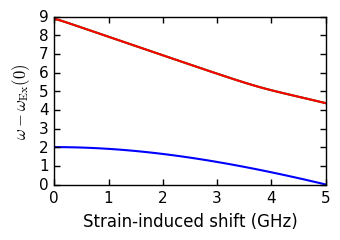

m1 transitions
p1


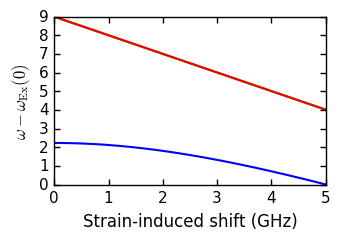

In [12]:
#### Pippin SIL 2 with magnetic field
reload(nvlevels)
# larmor frequency at LT3: 447734.89 Hz
gamma_c = 1.0705e3 #g-factor for C13 in Hz/G
Bz = 447735./gamma_c
print 'Magnetic field in Gauss: ', round(Bz,3)
B = [0.,0.,Bz]
Ex = 49.6
Ey = 42.5
print Ex-Ey
xm1,ym1 = create_plottables_transitions(Ex,Ey,0,10,100,B_field=B,m1=True,p1=False)

xp1,yp1 = create_plottables_transitions(Ex,Ey,0,10,100,B_field=B,m1=False,p1=True)
ax = plot_plottables(np.array(xm1)/2.,[np.array(ym1[1])-min(ym1[1]),np.array(ym1[4])-min(ym1[1]),np.array(yp1[4])-min(ym1[1])],return_ax = True)

### plot styling:
fontsize = 12
lw = 1
ax.set_xlabel(r'Strain-induced shift (GHz)',size = fontsize)
ax.set_ylabel(r'$\omega - \omega_\mathrm{Ex}(0)$',size = fontsize)
ax.xaxis.set_tick_params(width=lw,labelsize = fontsize-1)
ax.yaxis.set_tick_params(width=lw,labelsize=fontsize-1)
# ax.legend([r'$|m_s = 0\rangle \rightarrow |E_x\rangle$',r'$|m_s = +1\rangle \rightarrow |A_1\rangle$',
#            r'$|m_s = -1\rangle \rightarrow |A_1\rangle$'],loc=2, borderaxespad=0.2,frameon = False,
#          fontsize = fontsize-2)
[i.set_linewidth(lw) for i in ax.spines.itervalues()]
plt.savefig('opt_trans_bfield_418G.pdf',format='pdf',bbox_inches = 'tight',pad_inches=0.3)
plt.show()
plt.close()


### and with no magnetic field
xm1,ym1 = create_plottables_transitions(Ex,Ey,0,10,100,B_field=[0,0,0],m1=True,p1=False)

xp1,yp1 = create_plottables_transitions(Ex,Ey,0,10,100,B_field=[0,0,0],m1=False,p1=True)
ax = plot_plottables(np.array(xm1)/2.,[np.array(ym1[1])-min(ym1[1]),np.array(ym1[4])-min(ym1[1]),np.array(yp1[4])-min(ym1[1])],return_ax = True)

### plot styling:
fontsize = 12
lw = 1
ax.set_xlabel(r'Strain-induced shift (GHz)',size = fontsize)
ax.set_ylabel(r'$\omega - \omega_\mathrm{Ex}(0)$',size = fontsize)
ax.xaxis.set_tick_params(width=lw,labelsize = fontsize-1)
ax.yaxis.set_tick_params(width=lw,labelsize=fontsize-1)
# ax.legend([r'$|m_s = 0\rangle \rightarrow |E_x\rangle$',r'$|m_s = +1\rangle \rightarrow |A_1\rangle$',
#            r'$|m_s = -1\rangle \rightarrow |A_1\rangle$'],loc=2, borderaxespad=0.2,frameon = False,
#          fontsize = fontsize-2)
[i.set_linewidth(lw) for i in ax.spines.itervalues()]
plt.savefig('opt_trans_no_bfield.pdf',format='pdf',bbox_inches = 'tight',pad_inches=0.3)
plt.show()
plt.close()

In [10]:
#LT3

# larmor frequency at LT3: 447734.89 Hz
gamma_c = 1.0705e3 #g-factor for C13 in Hz/G
Bz = 447735./gamma_c
print Bz
#error si roughly 5 Hz
uBz = 5./gamma_c
print uBz

# LT4
Bz = 443165.2/gamma_c
print Bz

418.248482018
0.00467071461934
413.979635684


In [ ]:
plot_plottables(xm1,ym1)
plot_plottables(xp1,yp1)


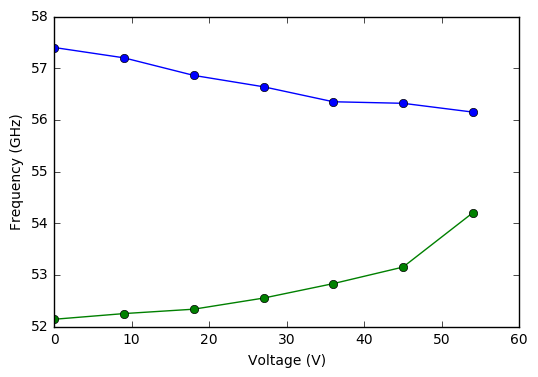

In [66]:
fig = plt.figure()
ax = plt.subplot()
Ex = [57.4,57.2,56.86,56.64,56.35,56.32,56.15]
Ey = [52.14,52.25,52.335,52.55,52.83,53.15,54.2]
Voltage = [0,9,18,27,36,45,54]

plt.plot(Voltage,Ex,marker='o')
plt.plot(Voltage,Ey,marker='o')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency (GHz)')